In [1]:
import pandas as pd # work w dataframes
import matplotlib.pyplot as plt # viz 
import seaborn as sns # HD viz
import numpy as np # numerical  python

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
import statistics # handle statistical operations

In [30]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [4]:
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

### Part 1 - What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:
- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories

Visualizations:
- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [32]:
freq_table = cat.category.value_counts().sort_values(ascending=False)
freq_table = pd.DataFrame(freq_table)
freq_table.head(10)

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
Manicure & Pedicure Products,18940
Skin Care,18769
Make-up,18756
Hair Care,18735


In [33]:
largest_5 = freq_table.nlargest(5, 'count')
largest_5

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


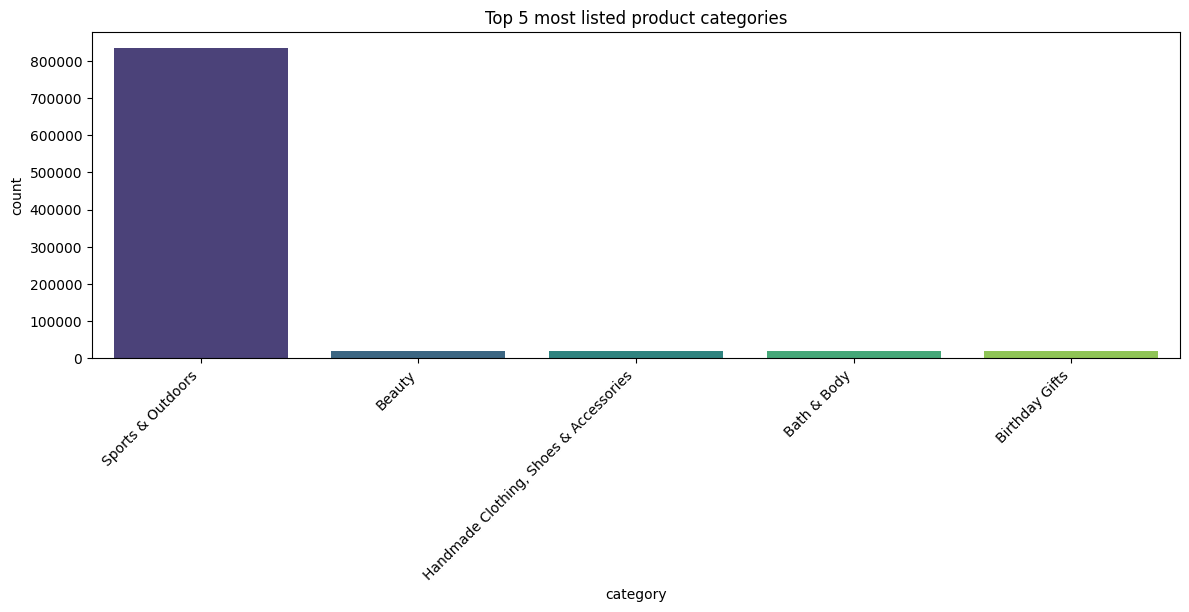

In [36]:
plt.figure(figsize=(12,6)) # to fix the size
sns.barplot(
    x='category',
    hue='category',
    y='count',
    data=largest_5,
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit everything
plt.title("Top 5 most listed product categories")
plt.show()

Text(0.5, 1.0, 'Top 5 cateogires')

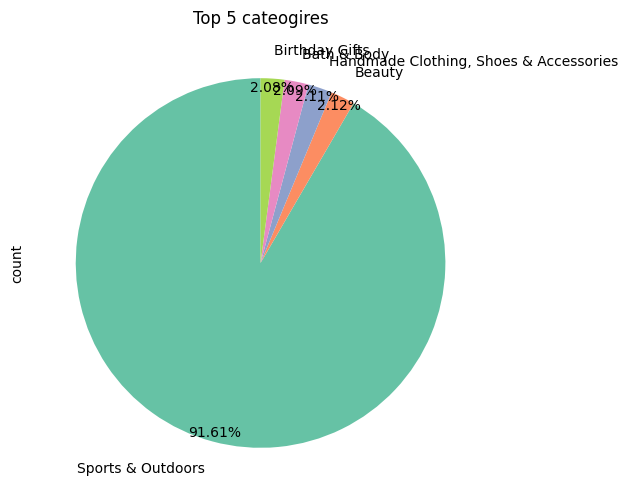

In [25]:
plt.figure(figsize=(12,6)) # to fix the size
largest_5.set_index('category')['count'].plot.pie(
    autopct='%1.2f%%', 
    startangle=90, 
    colors=sns.color_palette('Set2'),
    pctdistance=0.95,  # Adjusts position of percentage labels
    labeldistance=1.15,  # Distance of labels from the center
    textprops={'fontsize': 10} # Font size for labels
    )

plt.title('Top 5 cateogires')

### Part 2 - How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:
- Calculate the mean, median, and mode for the price of products.
- What's the average price point of products listed? How does this compare with the most common price point (mode)?

Measures of Dispersion:
- Determine the variance, standard deviation, range, and interquartile range for product price.
- How varied are the product prices? Are there any indicators of a significant spread in prices?

Visualizations:
- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


In [26]:
df.price.describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [ ]:
# MEASURES OF CENTRALITY

In [66]:
p_mean = df.price.mean().round(2)
p_med = df.price.median()
p_mode = df.price.mode()
p_std = df.price.std()
p_var = df.price.var()
p_min = df.price.min()
p_max = df.price.max()

print(f'Price std: {p_std}\nPrice var: {p_var}\nPrice min: {p_min}\nPrice max: {p_max}')
print(f"Price mean: {p_mean} \nPrice median: {p_med} \nPrice mode: {p_mode}")

Price std: 345.60886175352226
Price var: 119445.48532256528
Price min: 0.0
Price max: 100000.0
Price mean: 89.24 
Price median: 19.09 
Price mode: 0    9.99
Name: price, dtype: float64


Conclusion:
- mean > median > mode --> Negative skew: distribution towards lower values
- Standard Deviation: shows a big spread in prices around the mean
- Variance: large variability within the dataset
- Minimum value: suggests there are free or very low-cost products
- Max value: existence of high-value products on Amazon


In [72]:
Q1 = df.price.quantile(0.25)
Q2 = df.price.quantile(0.5)
Q3 = df.price.quantile(0.75)

print(f"Q1: {Q1},\nQ2: {Q2},\nQ3: {Q3}")

Q1: 9.99,
Q2: 19.09,
Q3: 45.99


In [43]:
range = p_max - p_min
range

100000.0

In [61]:
df1 = df[df.price < 500]

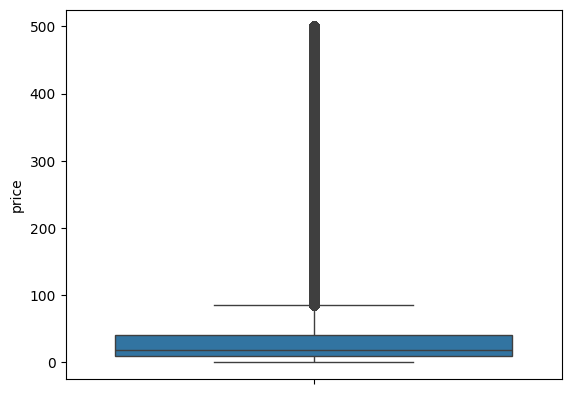

In [62]:
sns.boxplot(data=df1.price)
plt.show()

In [47]:
df2 = df[df.price < 100]

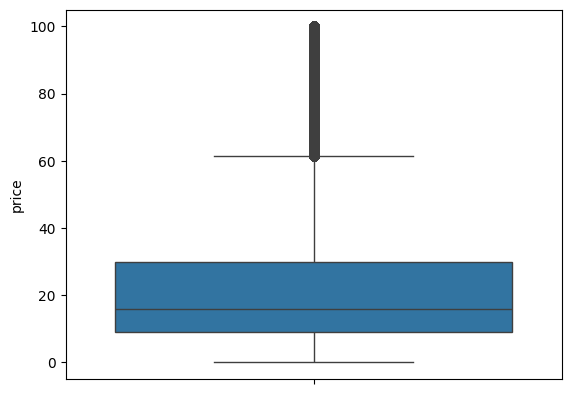

In [48]:
sns.boxplot(data=df2.price)
plt.show()

<Axes: xlabel='price', ylabel='Count'>

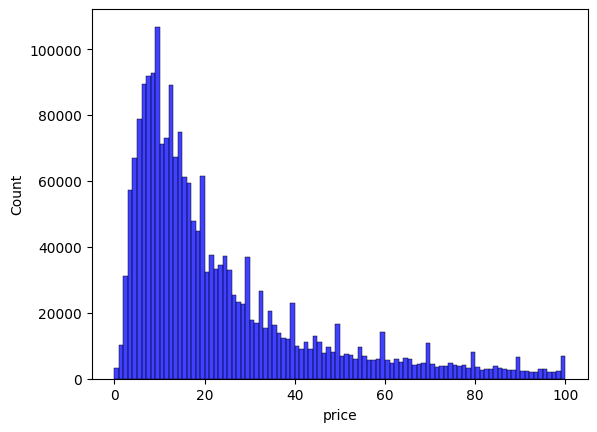

In [51]:
sns.histplot(df2.price, bins=100, color='blue')

### Part 3 - How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:
- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

Measures of Dispersion:
- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

Shape of the Distribution:
- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

Visualizations:
- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [64]:
df.stars.describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [67]:
s_mean = df.stars.mean().round(2)
s_med = df.stars.median()
s_mode = df.stars.mode()
s_std = df.stars.std()
s_var = df.stars.var()
s_min = df.stars.min()
s_max = df.stars.max()

print(f'Stars std: {s_std}\nStars var: {s_var}\nStars min: {s_min}\nStars max: {s_max}')
print(f"Stars mean: {s_mean} \nStars median: {s_med} \nStars mode: {s_mode}")

Stars std: 2.1948653785054697
Stars var: 4.81743402976196
Stars min: 0.0
Stars max: 5.0
Stars mean: 2.15 
Stars median: 0.0 
Stars mode: 0    0.0
Name: stars, dtype: float64


In [73]:
Q1 = df.stars.quantile(0.25)
Q2 = df.stars.quantile(0.5)
Q3 = df.stars.quantile(0.75)

print(f"Q1: {Q1},\nQ2: {Q2},\nQ3: {Q3}")

Q1: 0.0,
Q2: 0.0,
Q3: 4.4


In [74]:
# SHAPE OF THE DISTRIBUTION
s_skew = df.stars.skew()
s_kurt = df.stars.kurtosis()

print(f"skew: {s_skew}, \nkurtosis: {s_kurt}")

skew: 0.08120735761080985, 
kurtosis: -1.9260061280432985


- The Skew is slightly poositive, poining out the presence of some outliers above the mode affecting the mean.
- The Kurtosis is negative, pointing a platykurtic distribution, so thinner tail and flatter peak. This indicates few extreme values.

<Axes: xlabel='stars', ylabel='Count'>

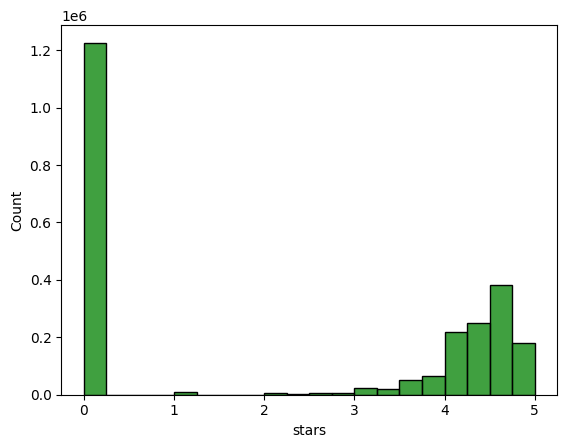

In [76]:
sns.histplot(df.stars, bins=20, color='green')

<Axes: xlabel='stars', ylabel='Count'>

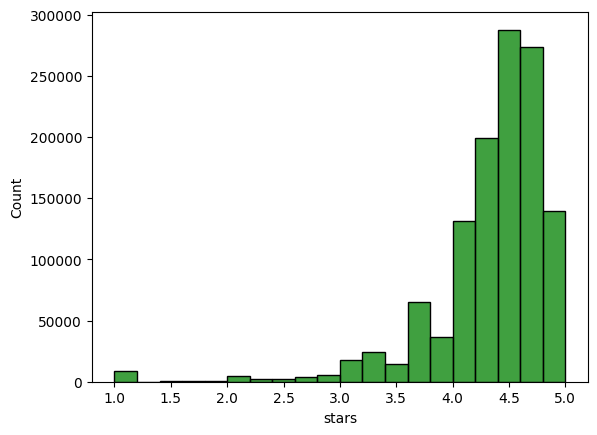

In [78]:
# There are a lot of 0, which can mean that people skipped the ratings. If we exclude those:
df_stars = df[df.stars > 0]
sns.histplot(df_stars.stars, bins=20, color='green')

In [81]:
# 2nd Review of skew
# SHAPE OF THE DISTRIBUTION
s_skew2 = df_stars.stars.skew()
s_kurt2 = df_stars.stars.kurtosis()

print(f"Shape of distribution without 0 ratinigs: \nskew: {s_skew2}, \nkurtosis: {s_kurt2}")

Shape of distribution without 0 ratinigs: 
skew: -2.3795681122127945, 
kurtosis: 9.78193769066435
